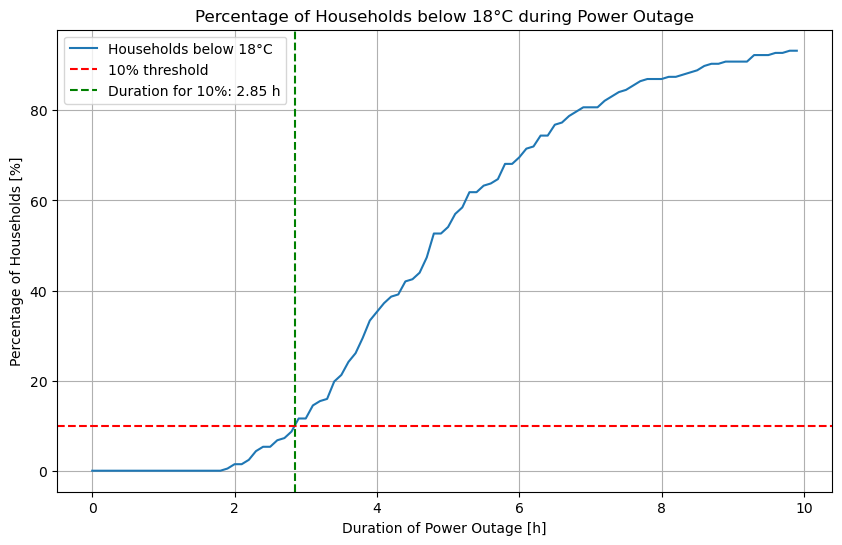

The duration of the power outage at which 10% of households fall below 18°C is approximately 2.85 hours.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'DATA_HOUSEHOLDS_BOX.xlsx'
data = pd.read_excel(file_path)

# Simulation parameters
initial_Tin = 20  # Initial temperature in degrees Celsius
threshold = 18    # Temperature threshold in degrees Celsius
time_steps = 10   # Max duration of the outage in hours (Just for the Plot)
dt = 0.1          # Time step in hours

# Create a time array
time = np.arange(0, time_steps, dt)

# List to store the percentage of houses falling below the threshold at each time
percentage_below_threshold = []

# Simulation for each time step
for t in time:
    below_threshold_count = 0
    for index, row in data.iterrows():
        R = row['R']
        C = row['C']
        T_out = row['Min_External_Temperature']
        T_in = initial_Tin
        
        # Euler method to solve the differential equation
        for _ in np.arange(0, t, dt):
            dTdt = (T_out - T_in) / (R * C)
            T_in += dTdt * dt
        
        # Count if the temperature falls below the threshold
        if T_in < threshold:
            below_threshold_count += 1
    
    # Calculate the percentage of houses below the threshold
    percentage = (below_threshold_count / len(data)) * 100
    percentage_below_threshold.append(percentage)

# Convert lists to numpy arrays for interpolation
time = np.array(time)
percentage_below_threshold = np.array(percentage_below_threshold)

# Interpolate to find the time at which 10% of households are below the threshold
target_percentage = 10
intersect_time = np.interp(target_percentage, percentage_below_threshold, time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, percentage_below_threshold, label='Households below 18°C')
plt.axhline(y=target_percentage, color='r', linestyle='--', label=f'{target_percentage}% threshold')
plt.axvline(x=intersect_time, color='g', linestyle='--', label=f'Duration for {target_percentage}%: {intersect_time:.2f} h')
plt.xlabel('Duration of Power Outage [h]')
plt.ylabel('Percentage of Households [%]')
plt.title('Percentage of Households below 18°C during Power Outage')
plt.legend()
plt.grid(True)

# Save the plot as a PDF file
plt.savefig('GB_Outage.pdf')

# Show the plot
plt.show()

# Display the result
print(f'The duration of the power outage at which 10% of households fall below 18°C is approximately {intersect_time:.2f} hours.')



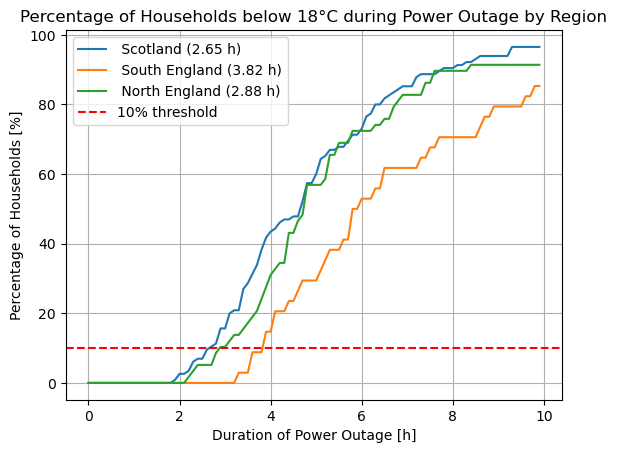

The duration of the power outage at which 10% of households in  Scotland fall below 18°C is approximately 2.65 hours.
The duration of the power outage at which 10% of households in  South England fall below 18°C is approximately 3.82 hours.
The duration of the power outage at which 10% of households in  North England fall below 18°C is approximately 2.88 hours.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'DATA_HOUSEHOLDS_BOX.xlsx'
data = pd.read_excel(file_path)

# Simulation parameters
initial_Tin = 20  # Initial temperature in degrees Celsius, 20 without notification and 22 with notification 
threshold = 18    # Temperature threshold in degrees Celsius
time_steps = 10   # Max duration of the outage in hours (Just for the Plot)
dt = 0.1          # Time step in hours

# Create a time array
time = np.arange(0, time_steps, dt)

# Dictionary to store the intersection times for each region
region_intersect_times = {}

# Group data by region
regions = data['Region_UK'].unique()

for region in regions:
    region_data = data[data['Region_UK'] == region]
    
    # List to store the percentage of houses falling below the threshold at each time
    percentage_below_threshold = []

    # Simulation for each time step
    for t in time:
        below_threshold_count = 0
        for index, row in region_data.iterrows():
            R = row['R']
            C = row['C']
            T_out = row['Min_External_Temperature']
            T_in = initial_Tin
            
            # Euler method to solve the differential equation
            for _ in np.arange(0, t, dt):
                dTdt = (T_out - T_in) / (R * C)
                T_in += dTdt * dt
            
            # Count if the temperature falls below the threshold
            if T_in < threshold:
                below_threshold_count += 1
        
        # Calculate the percentage of houses below the threshold
        percentage = (below_threshold_count / len(region_data)) * 100
        percentage_below_threshold.append(percentage)

    # Convert lists to numpy arrays for interpolation
    percentage_below_threshold = np.array(percentage_below_threshold)

    # Interpolate to find the time at which 10% of households are below the threshold
    target_percentage = 10
    intersect_time = np.interp(target_percentage, percentage_below_threshold, time)
    
    # Store the result for the region
    region_intersect_times[region] = intersect_time

    # Plot the results for each region
    plt.plot(time, percentage_below_threshold, label=f'{region} ({intersect_time:.2f} h)')

# Add horizontal and vertical lines for the 10% threshold
plt.axhline(y=target_percentage, color='r', linestyle='--', label=f'{target_percentage}% threshold')

# Customize plot
plt.xlabel('Duration of Power Outage [h]')
plt.ylabel('Percentage of Households [%]')
plt.title('Percentage of Households below 18°C during Power Outage by Region')
plt.legend()
plt.grid(True)
plt.show()

# Display the result for each region
for region, intersect_time in region_intersect_times.items():
    print(f'The duration of the power outage at which 10% of households in {region} fall below 18°C is approximately {intersect_time:.2f} hours.')



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'DATA_HOUSEHOLDS_BOX.xlsx'
data = pd.read_excel(file_path)

# Simulation parameters
initial_Tin = 20  # Initial temperature in degrees Celsius, 20 without notification and 22 with notification 
threshold = 18    # Temperature threshold in degrees Celsius
fixed_outage_duration = 3  # Fixed duration of the outage in hours
dt = 0.1  # Time step in hours

# Create a time array for the fixed duration
time = np.arange(0, fixed_outage_duration, dt)

# Dictionary to store the percentages of households below the threshold for each region
region_percentages = {}

# Group data by region
regions = data['Region_UK'].unique()

for region in regions:
    region_data = data[data['Region_UK'] == region]
    
    # Simulate for the fixed outage duration
    below_threshold_count = 0
    for index, row in region_data.iterrows():
        R = row['R']
        C = row['C']
        T_out = row['Min_External_Temperature']
        T_in = initial_Tin
        
        # Euler method to solve the differential equation
        for _ in np.arange(0, fixed_outage_duration, dt):
            dTdt = (T_out - T_in) / (R * C)
            T_in += dTdt * dt
        
        # Count if the temperature falls below the threshold
        if T_in < threshold:
            below_threshold_count += 1
    
    # Calculate the percentage of houses below the threshold
    percentage = (below_threshold_count / len(region_data)) * 100
    region_percentages[region] = percentage

# Display the results for each region
for region, percentage in region_percentages.items():
    print(f'The percentage of households in {region} that fall below 18°C during a 3-hour power outage is approximately {percentage:.2f}%.')

# Part 2: Calculate energy saved in N hours, remeber to calculate this first with the other code
energy_consumption = {
    'North England': 828.941324, #Change according to your case
    'Scotland': 1930.279508, #Change according to your case
    'South England': 677.718078 #Change according to your case
}

# Calculate energy saved per region and total
total_energy_saved = 0
print("\nEnergy saved in N hours:") #Change N for your specific case
for region, daily_consumption in energy_consumption.items():
    energy_saved = daily_consumption * fixed_outage_duration  # Convert daily consumption in kWh to kW for N hours
    total_energy_saved += energy_saved
    print(f'{region}: {energy_saved:.2f} kW')

print(f'Total energy saved: {total_energy_saved:.2f} kW')


The percentage of households in  Scotland that fall below 18°C during a 3-hour power outage is approximately 15.65%.
The percentage of households in  South England that fall below 18°C during a 3-hour power outage is approximately 0.00%.
The percentage of households in  North England that fall below 18°C during a 3-hour power outage is approximately 10.34%.

Energy saved in N hours:
North England: 2486.82 kW
Scotland: 5790.84 kW
South England: 2033.15 kW
Total energy saved: 10310.82 kW
